In [3]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv("iplauction2023.csv")
df

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
...,...,...,...,...,...,...,...
304,MS Dhoni,WK-Batter,India,NaN,1200.0,CSK,RETAINED
305,Moeen Ali,Allrounder,England,NaN,800.0,CSK,RETAINED
306,Ruturaj Gaikwad,Batter,India,NaN,600.0,CSK,RETAINED
307,Rishabh Pant,WK-Batter,India,NaN,1600.0,DC,RETAINED


In [ ]:
- Our Variable Features:-

- Name :-Name of the players.
- Player Style:- Playing style of the player.
- Nationality:- Show the nationality of the players.
- Base price (in lacs):- Base price of the player.
- Final price (in lacs):- Final price of the player.
- Franchise:- Name of the ipl teams.
- Status:- Show the status of the players(sold,unsold or retained).

In [6]:
print("Number Of Row",df.shape[0])
print("Number Of Col",df.shape[1])

Number Of Row 309
Number Of Col 7


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [8]:
df.isna().sum()

name                       0
player style               0
nationality                0
base price (in lacs)     158
final price (in lacs)     71
franchise                 71
status                     0
dtype: int64

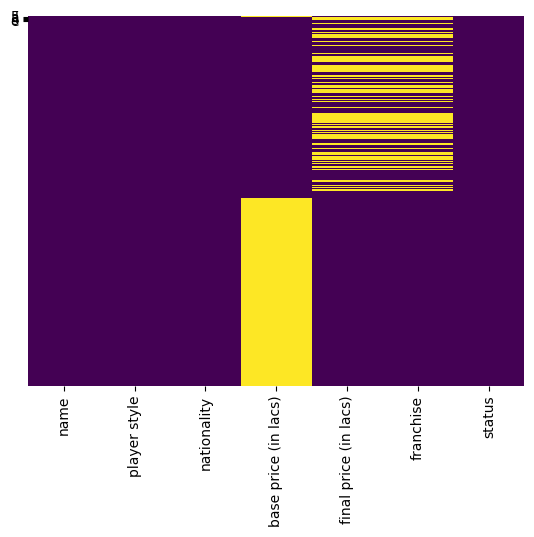

In [4]:
sns.heatmap(df.isnull(),yticklabels="False",cbar=False,cmap="viridis")
plt.show()

In [9]:
df.head()

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD


In [10]:
158/309*100

51.1326860841424

In [11]:
bpc=df["base price (in lacs)"].mean()

In [12]:
df["base price (in lacs)"].fillna(bpc,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   309 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

name                     0
player style             0
nationality              0
base price (in lacs)     0
final price (in lacs)    0
franchise                0
status                   0
dtype: int64

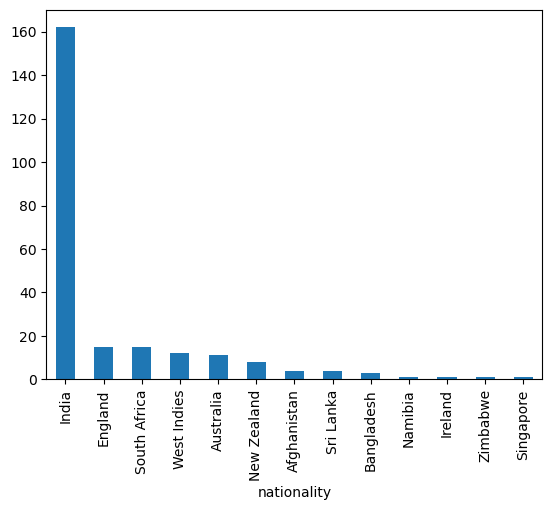

In [23]:
df["nationality"].value_counts().plot(kind="bar")
plt.xlabel("nationality")
plt.ylabel("")
plt.title("")
plt.show()
#This graph shows from which country how many players played in ipl. 

In [24]:
df["nationality"].value_counts()

India           162
England          15
South Africa     15
West Indies      12
Australia        11
New Zealand       8
Afghanistan       4
Sri Lanka         4
Bangladesh        3
Namibia           1
Ireland           1
Zimbabwe          1
Singapore         1
Name: nationality, dtype: int64

<Axes: xlabel='nationality', ylabel='count'>

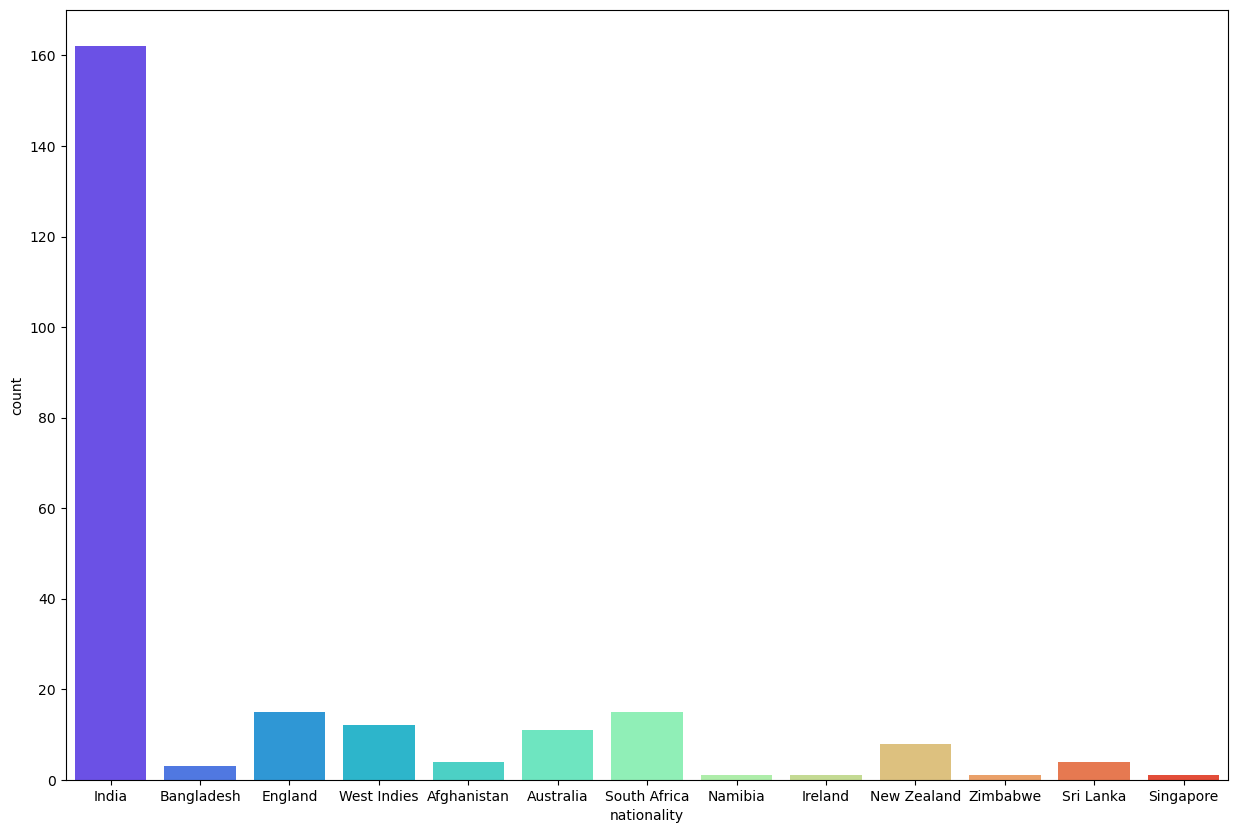

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x="nationality",palette="rainbow")
#

In [32]:
df["franchise"].value_counts()

RR      25
SRH     25
LSG     25
CSK     25
RCB     25
GT      25
DC      24
MI      23
PBKS    22
KKR     19
Name: franchise, dtype: int64

<Axes: xlabel='franchise', ylabel='count'>

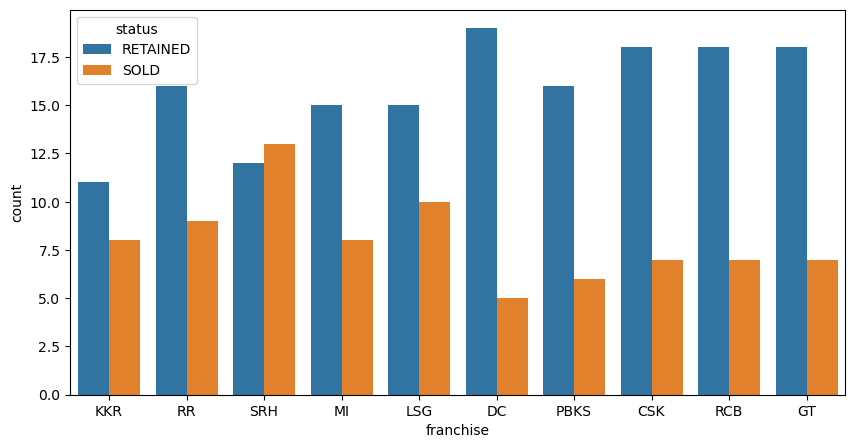

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="franchise",hue="status")
#This graph shows in ipl franchise teams how many players are sold and retained.

In [38]:
df["player style"].value_counts()

Bowler        87
Allrounder    77
Batter        44
WK-Batter     30
Name: player style, dtype: int64

<Axes: xlabel='franchise', ylabel='count'>

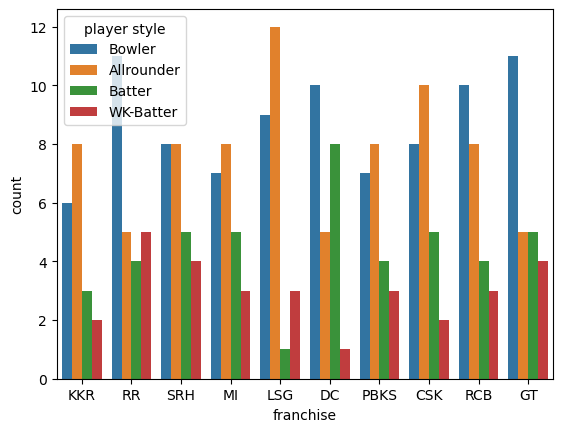

In [39]:
sns.countplot(data=df, x="franchise",hue="player style")
#This graph shows the player style of each franchise team.

<Axes: xlabel='final price (in lacs)', ylabel='Density'>

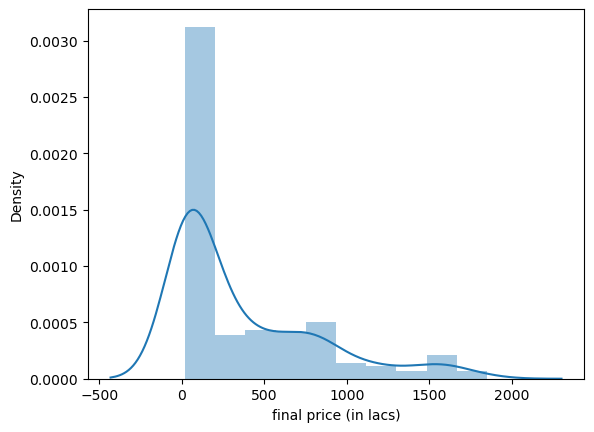

In [41]:
sns.distplot(df["final price (in lacs)"])
#The final price (in lacs) skewness shows the right skewness.

<Axes: >

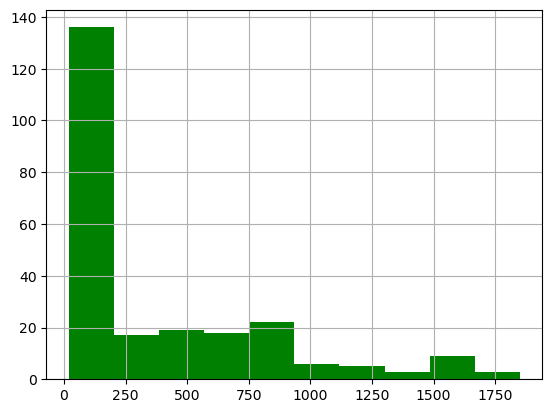

In [42]:
df["final price (in lacs)"].hist(color="green")

<Axes: xlabel='base price (in lacs)', ylabel='Density'>

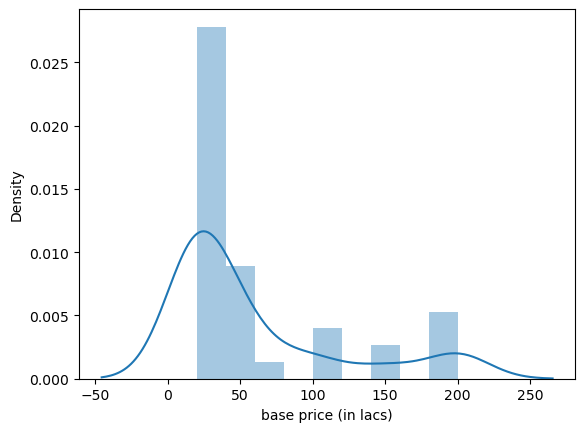

In [8]:
sns.distplot(df["base price (in lacs)"])
#The base price (in lacs) skewness shows the right skewness.

<Axes: >

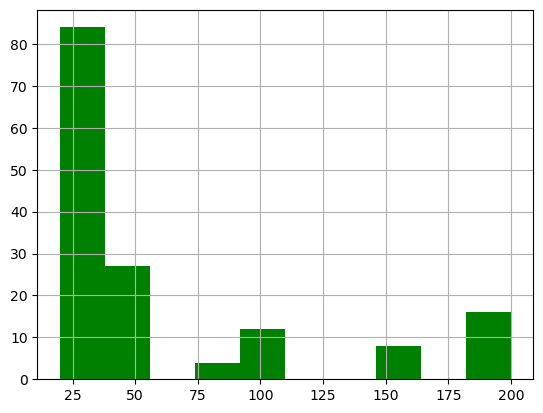

In [9]:
df["base price (in lacs)"].hist(color="green")

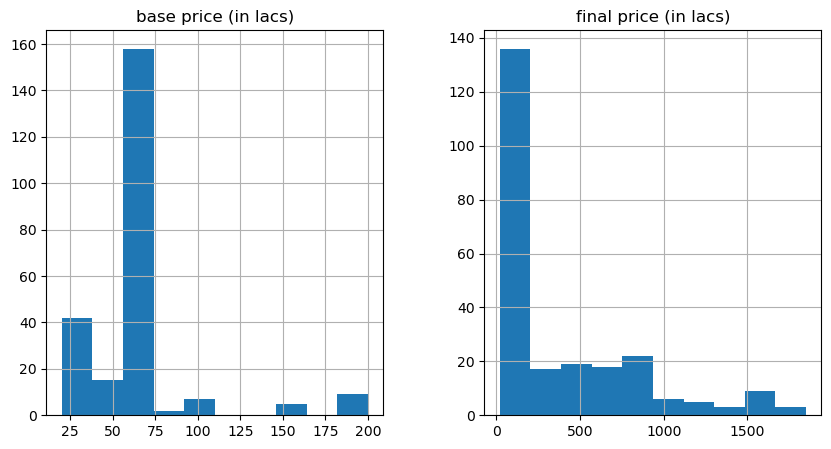

In [45]:
df.hist(figsize=(10,5))
plt.show()

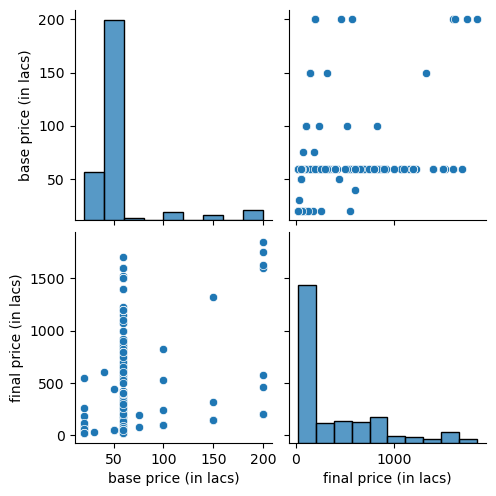

In [46]:
sns.pairplot(df)

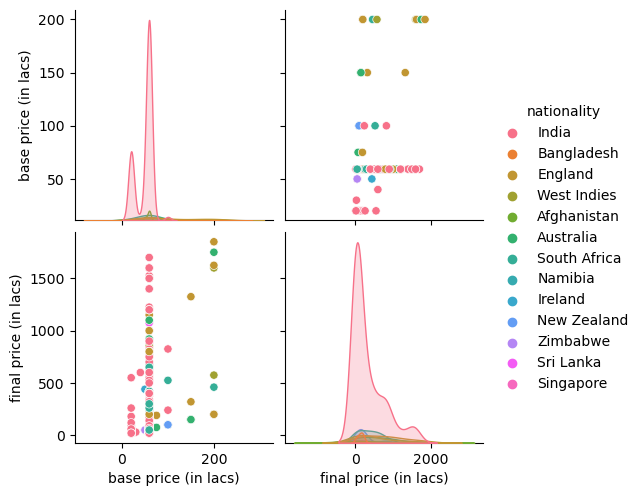

In [47]:
sns.pairplot(df,hue="nationality")

<Axes: >

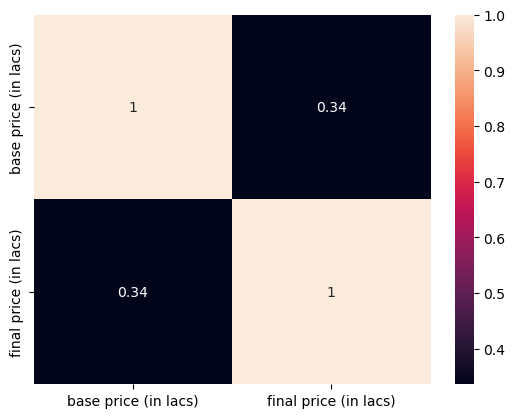

In [48]:
sns.heatmap(df.corr(),annot=True)